# Import all datasets

In [ ]:

import pandas as pd
import os

#import the datasets
folder="C:/Users/sejja/Downloads/Compressed/cleaned_data/cleaned_data/"

df_facebook=pd.read_csv(folder+"facebook_clean.csv")

df_twitter=pd.read_csv(folder+"twitter_clean.csv")
df_hespress=pd.read_csv(folder+"hespress_clean.csv")
df_youtube=pd.read_csv(folder+"youtube_clean.csv")

df_facebook.columns,df_twitter.columns,df_hespress.columns,df_youtube.columns


## Normalisation

In [ ]:


# Rename columns to match
df_twitter = df_twitter.rename(columns={'Content': 'Comment'})
df_twitter = df_twitter.rename(columns={'language': 'Language'})
df_youtube = df_youtube.rename(columns={'Comment Date': 'Date'})

# Select only the desired columns
df_facebook = df_facebook[['Comment', 'Date', 'Language', 'source']]
df_twitter = df_twitter[['Comment', 'Date', 'Language', 'source']]
df_hespress = df_hespress[['Comment', 'Date', 'Language', 'source']]
df_youtube = df_youtube[['Comment', 'Date', 'Language', 'source']]


# Concatenate the dataframes
df_merge = pd.concat([df_facebook, df_twitter, df_hespress, df_youtube], ignore_index=True)


In [ ]:
df_youtube

,Comment,Date,Language,source
0,أحببتكم ❤ نريد مزيدا من هذه المقاطع ❤,2024-03-31T12:16:26Z,ar,Youtube
1,yeah كذاب😂😂,2024-03-31T05:00:08Z,ar,Youtube
2,معرفتشي على المغربيات رخیصات بزاف وخاصتا تعا...,2024-03-31T03:26:13Z,ar,Youtube
3,حبيييت ❤❤,2024-03-31T01:59:41Z,ar,Youtube
4,دوي لينا على كيفاش تعلمتي لونغلي,2024-03-30T23:34:36Z,ar,Youtube
...,...,...,...,...
165719,wa akhiraannnnn❤,2024-03-26T18:32:23Z,fr,Youtube
165720,جوجو ضريف 😅 مشاء الله عليكم,2024-03-26T18:11:54Z,ar,Youtube
165721,you guys look so cute 😭,2024-03-26T18:10:39Z,fr,Youtube
165722,كنفكر شنو نكتب باش ياخذ تعليقي اكبر عدد من الل...,2024-03-26T18:08:31Z,ar,Youtube


<Axes: >

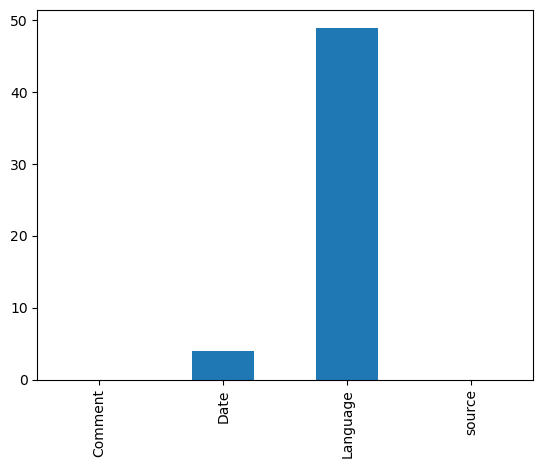

In [ ]:
df_merge.isnull().sum().plot(kind='bar')


### Replace null values in the 'Language' column with 'ar'


In [ ]:
# Replace null values in the 'Language' column with 'ar'
df_merge['Language'].fillna('ar', inplace=True)

# Drop rows with null values in the 'Date' column
df_merge.dropna(subset=['Date'], inplace=True)

### Delete  comments with more less than  2 word

In [ ]:
df_merge = df_merge[df_merge['Comment'].str.split().str.len() >= 2]


In [ ]:
df_merge.isnull().sum().sum()


0

In [ ]:
df_merge.shape

(161781, 4)

<Axes: >

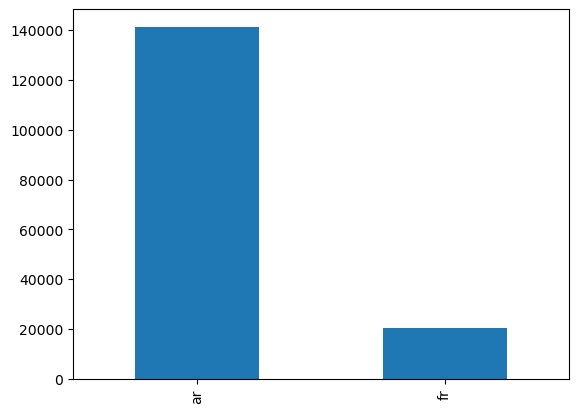

In [ ]:
columns= df_merge.columns

df_merge[columns[2]].value_counts().plot(kind='bar')

<Axes: >

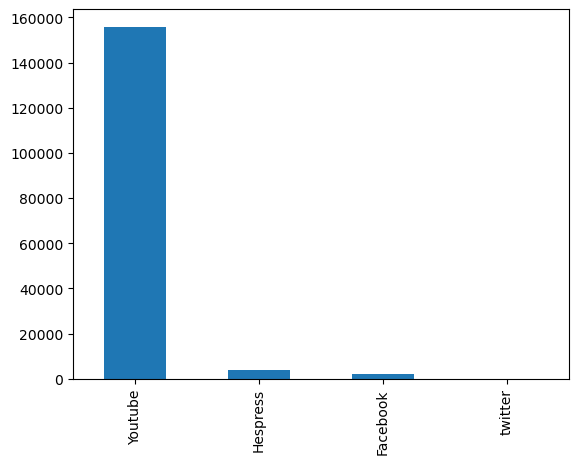

In [ ]:
df_merge[columns[3]].value_counts().plot(kind='bar')

IndexError: index 4 is out of bounds for axis 0 with size 4

# saving data

In [ ]:
datasetFr=df_merge[df_merge['Language']=='fr']
datasetAr=df_merge[df_merge['Language']=='ar']
datasetFr.to_csv("dataset_fr.csv")
datasetAr.to_csv("dataset_ar.csv")

In [ ]:
df_merge.to_csv('merge_data.csv')

# Preprocessing and Cleaning


In [ ]:
import pandas as pd
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# Load the Moroccan Darija dataset from JSON file
stopwords_darija = pd.read_json("data/all_stop_words.json")

# Load the emoji dataset
df_emoji = pd.read_csv("data/emojis.csv")

# Display the first few rows of the datasets
print("Moroccan Darija Dataset:")
print(df_darija.head())

print("\nEmoji Dataset:")
print(df_emoji.head())


Moroccan Darija Dataset:
               0
0           بيرا
1        ثلاثمئة
2          خبَّر
3  تلاتا و عشرين
4            ستا

Emoji Dataset:
  emoji              text
0     🎃         جاك فانوس
1     🎄  شجرة عيد الميلاد
2     🎆       العاب ناريه
3     🎇            الماسة
4     🧨      مفرقعة نارية


# Remove non-Arabic words , Tokenization , stopwords ,Stemming


In [ ]:


stopwords_darija = pd.read_json("data/all_stop_words.json").iloc[:, 0].tolist()


# Function to clean and preprocess text without Stemming
def clean_text(text):
    # Remove non-Arabic words
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_darija]
    # Join tokens back into text
    clean_text = ' '.join(tokens)
    return clean_text

# with c

def preprocess_text(text):
    # Remove non-Arabic words
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
        # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords_darija]
    # Stemming - using SnowballStemmer for Arabic languages
    stemmer = SnowballStemmer('arabic')
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)
print ('sample example : هما ديرين غير إشهار كون متزوجين و نوين  ستا يكم.. ')
print("methode without stemming")
print(clean_text( "هما ديرين غير إشهار كون متزوجين و نوين  ستا يكم...	"))
print("methode with stemming")
print(clean_text( "هما ديرين غير إشهار كون متزوجين و نوين  ستا يكم...	"))

sample example : هما ديرين غير إشهار كون متزوجين و نوين  ستا يكم.. 
methode without stemming
ديرين إشهار كون متزوجين نوين يكم
methode with stemming
ديرين إشهار كون متزوجين نوين يكم


In [ ]:

# Apply preprocessing to the 'comment' column
datasetAr['cleaned_comment'] = df_merge['Comment'].apply(preprocess_text)

# Apply cleaning function to 'comment' column in df_merge
datasetAr['clean_comment'] = datasetAr['Comment'].apply(clean_text)

C:\Users\sejja\AppData\Local\Temp\ipykernel_52512\3462498783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetAr['cleaned_comment'] = df_merge['Comment'].apply(preprocess_text)
C:\Users\sejja\AppData\Local\Temp\ipykernel_52512\3462498783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetAr['clean_comment'] = datasetAr['Comment'].apply(clean_text)


In [ ]:
# Create dictionary for emoji replacement
emoji_dict = dict(zip(df_emoji['emoji'], df_emoji['text']))

# Function to replace emojis with their meanings
def replace_emoji(text):
    for emoji, meaning in emoji_dict.items():
        text = text.replace(emoji, meaning)
    return text

# Apply emoji replacement to 'clean_comment' column
datasetAr['clean_comment'] = datasetAr['clean_comment'].apply(replace_emoji)
datasetAr['cleaned_comment'] = datasetAr['cleaned_comment'].apply(replace_emoji)

C:\Users\sejja\AppData\Local\Temp\ipykernel_52512\3663059545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetAr['clean_comment'] = datasetAr['clean_comment'].apply(replace_emoji)
C:\Users\sejja\AppData\Local\Temp\ipykernel_52512\3663059545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetAr['cleaned_comment'] = datasetAr['cleaned_comment'].apply(replace_emoji)


In [ ]:
datasetAr.head()

,Comment,Date,Language,source,cleaned_comment,clean_comment
0,اصلا هما ديرين غير إشهار كون متزوجين ونوين يكم...,2024-03-29 00:00:00,ar,Facebook,اصل دير اشهار كون متزوج ونو يكمل طريق مغد مرا ...,اصلا ديرين إشهار كون متزوجين ونوين يكملو طريق ...
1,قال النبي ﷺ: إذا مات ابن آدم انقطع عمله إلا من...,2024-03-29 00:00:00,ar,Facebook,النب مات ابن ادم انقطع عمل صدق جار ينتفع ولد ص...,النبي مات ابن آدم انقطع عمله صدقة جارية ينتفع ...
2,هذا المشهد جعلني اتذكر حكمة قالها جنرال الماني...,2024-03-29 00:00:00,ar,Facebook,مشهد جعل اتذكر حكم قال جنرال مان حرب عالم لم ي...,المشهد جعلني اتذكر حكمة قالها جنرال الماني الح...
3,وناري معامن عايشين الناس وصلو للقمر و نتوما حا...,2024-03-28 00:00:00,ar,Facebook,نار معام عايش ناس صلو قمر نتوم حاض تزوج تفارق,وناري معامن عايشين الناس وصلو للقمر نتوما حاضي...
4,المهم راه شدات 10 مليون مؤخر الصداق,2024-03-31 12:00:00,ar,Facebook,مهم راه شدا موخر صداق,المهم راه شدات مؤخر الصداق


In [ ]:
datasetAr=datasetAr[['Comment','Date','source','cleaned_comment','clean_comment']]
datasetAr.to_csv('cleanforML_ar.csv')

## dataset_ar.csv:

**Description:** This dataset contains comments collected from various sources (e.g., Facebook, Twitter, Hespress, YouTube) in Arabic language (Moroccan Darija).

**Columns:**
- `Comment`: The text of the comment.
- `Date`: The date when the comment was posted.
- `source`: The source platform where the comment was posted.

**Purpose:** This dataset can be used for various text analysis tasks such as sentiment analysis, topic modeling, and classification specifically targeting Arabic-speaking audiences.

---
## dataset_fr.csv:

**Description:** This dataset contains comments collected from various sources (e.g., Facebook, Twitter, Hespress, YouTube) in Frensh language (Moroccan Darija).

**Columns:**
- `Comment`: The text of the comment.
- `Date`: The date when the comment was posted.
- `source`: The source platform where the comment was posted.

**Purpose:** This dataset can be used for various text analysis tasks such as sentiment analysis, topic modeling, and classification specifically targeting Frensh-speaking audiences.

---

## merge_data.csv:

**Description:** This dataset is a merged dataset containing comments from different platforms (Facebook, Twitter, Hespress, YouTube) in both French and Arabic languages.

**Columns:**
- `Comment`: The text of the comment.
- `Date`: The date when the comment was posted.
- `Language`: The language of the comment (either 'fr' for French or 'ar' for Arabic).
- `source`: The source platform where the comment was posted.

**Purpose:** This dataset can be used for comparative analysis between French and Arabic comments, language identification tasks, and multilingual text analysis.

---

## cleanforML_ar.csv:

**Description:** This dataset contains cleaned and preprocessed comments collected from various sources in Arabic language (Moroccan Darija) specifically prepared for machine learning tasks.

**Columns:**
- `Comment`: The original text of the comment.
- `Date`: The date when the comment was posted.
- `source`: The source platform where the comment was posted.
- `cleaned_comment`: The cleaned and preprocessed version of the comment without stemming.
- `clean_comment`: The cleaned and preprocessed version of the comment with stemming applied.

**Purpose:** This dataset can be used for machine learning tasks such as sentiment analysis, classification, and language modeling after preprocessing and feature engineering.
